# S4- CASO PRACTICO-BDD FINAL

### Participantes GRUPO 3:

- Juan José Cabrera
- Marco Vinicio Chasiluisa
- Luis Felipe Contreras
- Ana Belén Erazo


### 1. Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

In [2]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

Ahora ,  llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [3]:
df=pd.read_csv("/Users/belen/Documents/GitHub/S4-CASOPRACTICO-BDDFINAL/Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### Recodificar el nombre de las columnas a español

In [4]:
df.rename({ 'Store':'tienda', 'Date': 'fecha', 'Weekly_Sales':'ventas_semanales', 'Holiday_Flag': 'flag_feriado', 'Temperature':'temperatura', 'Fuel_Price': 'precio_combustible', 'CPI': 'CPI', 'Unemployment': 'desempleo'  }, axis=1, inplace=True)

Se separa el campo de fecha para poder categorizar las ventas por año.

In [5]:
df[['dia', 'mes', 'anio']] = df['fecha'].str.split('-', expand=True)
df

,tienda,fecha,ventas_semanales,flag_feriado,temperatura,precio_combustible,CPI,desempleo,dia,mes,anio
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


### 2. Obtenga los descriptivos resumen de la base de datos e identifique las variables numéricas y categóricas. Indique ¿hay algo que le llame la atención? 


En dataset podemos encontrar 11 campos. De ellos, 7 son variables númericas y 4 son categóricas.

In [16]:
var_cuantitativas = df.select_dtypes('number').columns
print("Variables cuantitativas:")
print(var_cuantitativas)
var_cualitativas  =df.select_dtypes('object').columns
print("Variables cualitativas:")
print(var_cualitativas)

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

Variables cuantitativas:
Index(['tienda', 'ventas_semanales', 'flag_feriado', 'temperatura',
       'precio_combustible', 'CPI', 'desempleo'],
      dtype='object')
Variables cualitativas:
Index(['fecha', 'dia', 'mes', 'anio'], dtype='object')


#### Análisis de valores descriptivos

In [6]:
df.describe()

,tienda,ventas_semanales,flag_feriado,temperatura,precio_combustible,CPI,desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Se observa que las ventas semanales tienen una media de alrededor de 1046965 unidades, con una variabilidad considerable representada por una desviación estándar de aproximadamente 564366 unidades. Además, se puede ver un bajo porcentaje de semanas con feriados de solo el 6.99%, y las condiciones climáticas varían desde temperaturas mínimas de -2.06 grados hasta máximas de 100.14 grados. El precio del combustible tiene un rango de 2472 unidades a 4468 unidades, mientras que el CPI y la tasa de desempleo muestran niveles promedio de 171.58 y 7.99%, respectivamente, con desviaciones estándar que indican cierta variabilidad.

### 3. Evalúe si la base contiene datos perdidos.

Se puede observar que no existen valores nulos o perdidos:

In [8]:
df.isna().sum()

tienda                0
fecha                 0
ventas_semanales      0
flag_feriado          0
temperatura           0
precio_combustible    0
CPI                   0
desempleo             0
dia                   0
mes                   0
anio                  0
dtype: int64

### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso detalle cuáles y qué método estadístico aplicaran para corregir. 

#### Análisis de valores extremos

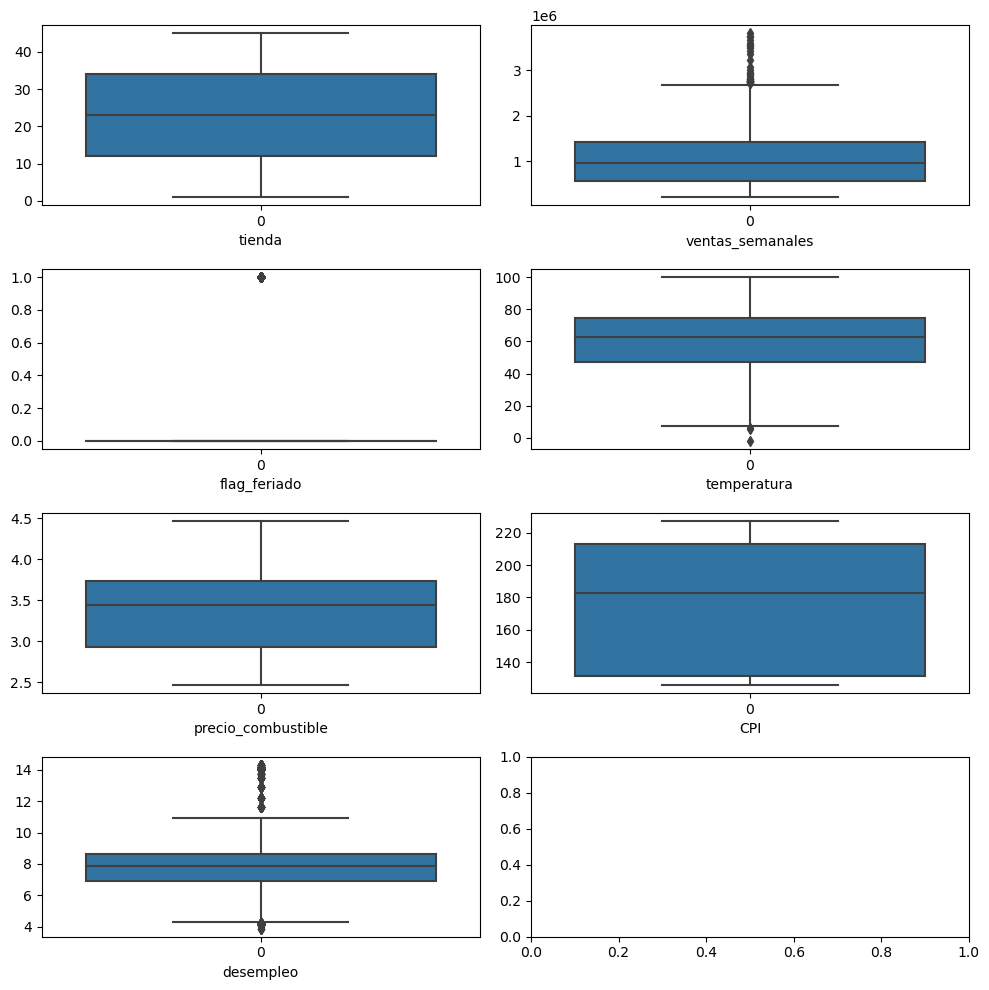

In [9]:
# Box plots
fig, axs = plt.subplots(4,2, figsize = (10,10))
plt1 = sns.boxplot(df['tienda'], ax = axs[0,0]).set(xlabel='tienda')
plt2 = sns.boxplot(df['ventas_semanales'], ax = axs[0,1]).set(xlabel='ventas_semanales')
plt3 = sns.boxplot(df['flag_feriado'], ax = axs[1,0]).set(xlabel='flag_feriado')
plt4 = sns.boxplot(df['temperatura'], ax = axs[1,1]).set(xlabel='temperatura')
plt5 = sns.boxplot(df['precio_combustible'], ax = axs[2,0]).set(xlabel='precio_combustible')
plt6 = sns.boxplot(df['CPI'], ax = axs[2,1]).set(xlabel='CPI')
plt7 = sns.boxplot(df['desempleo'], ax = axs[3,0]).set(xlabel='desempleo')

plt.tight_layout()

De la gráfica de boxplot, podemos ver que las variables donde se requiere el tratamiento de valores extremos son desempleo, temperatura y ventas_semanales.

Para los valores de flag_feriado no será tomado como valores extremos porque representa una variable cualificativa.

#### Tratamiento de valores atípicos


In [10]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['ventas_semanales'].quantile(0.25)
Q3 = df['ventas_semanales'].quantile(0.75)

print("Q1: ")
print(Q1)
print("Q3: ")
print(Q3)

IQR = Q3 - Q1  #rango intercuartil
print("IQR: ")
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['ventas_semanales'] < (Q1 - 1.5 * IQR)) |(df['ventas_semanales'] > (Q3 + 1.5 * IQR)))]
df.shape

Q1: 
553350.105
Q3: 
1420158.66
IQR: 
866808.5549999999


(6401, 11)

In [11]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['desempleo'].quantile(0.25)
Q3 = df['desempleo'].quantile(0.75)

print("Q1: ")
print(Q1)
print("Q3: ")
print(Q3)

IQR = Q3 - Q1  #rango intercuartil
print("IQR: ")
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['desempleo'] < (Q1 - 1.5 * IQR)) |(df['desempleo'] > (Q3 + 1.5 * IQR)))]
df.shape

Q1: 
6.891
Q3: 
8.622
IQR: 
1.7309999999999999


(5920, 11)

In [12]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['temperatura'].quantile(0.25)
Q3 = df['temperatura'].quantile(0.75)

print("Q1: ")
print(Q1)
print("Q3: ")
print(Q3)

IQR = Q3 - Q1  #rango intercuartil
print("IQR: ")
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['temperatura'] < (Q1 - 1.5 * IQR)) |(df['temperatura'] > (Q3 + 1.5 * IQR)))]
df.shape

Q1: 
46.965
Q3: 
74.7225
IQR: 
27.757499999999993


(5919, 11)

### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas. 

<Axes: xlabel='tienda', ylabel='Density'>

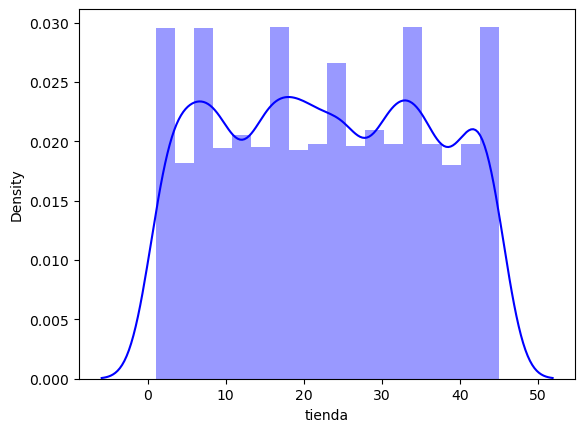

In [13]:
sns.distplot(df['tienda'],color="blue")

<Axes: xlabel='ventas_semanales', ylabel='Density'>

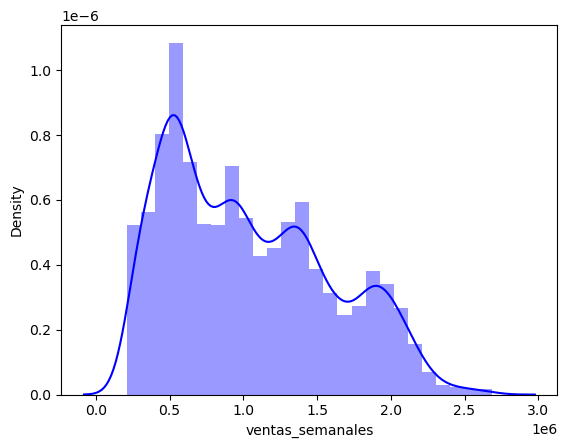

In [14]:
sns.distplot(df['ventas_semanales'],color="blue")

<Axes: xlabel='flag_feriado', ylabel='Density'>

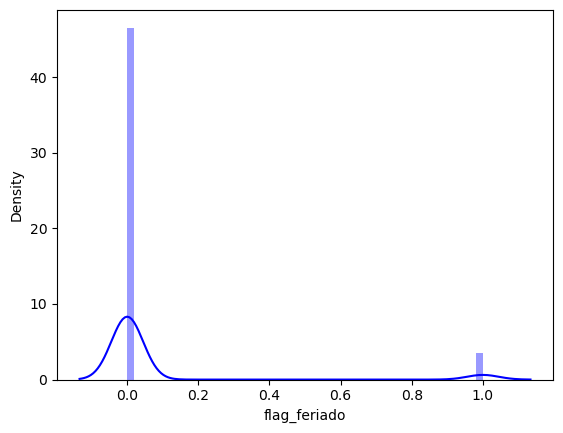

In [15]:
sns.distplot(df['flag_feriado'],color="blue")

<Axes: xlabel='temperatura', ylabel='Density'>

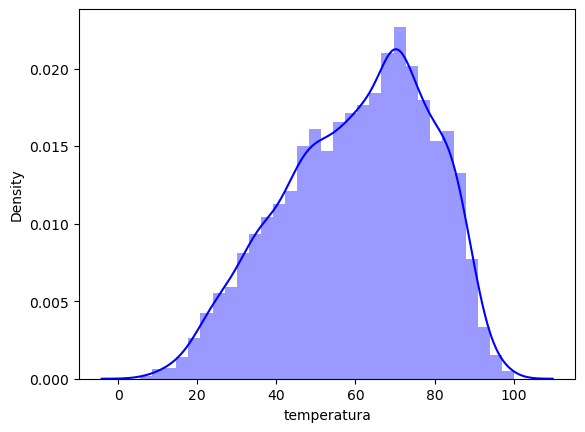

In [17]:
sns.distplot(df['temperatura'],color="blue")

<Axes: xlabel='precio_combustible', ylabel='Density'>

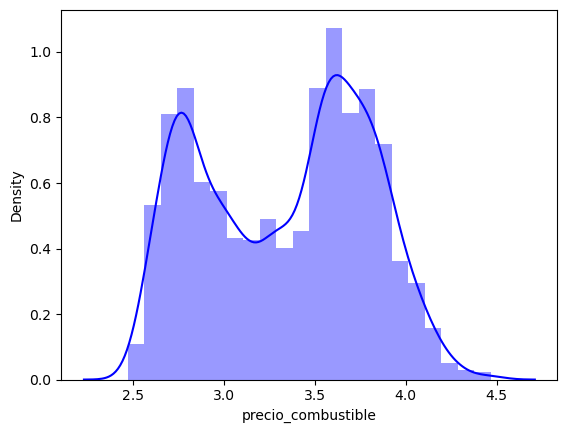

In [18]:
sns.distplot(df['precio_combustible'],color="blue")

<Axes: xlabel='CPI', ylabel='Density'>

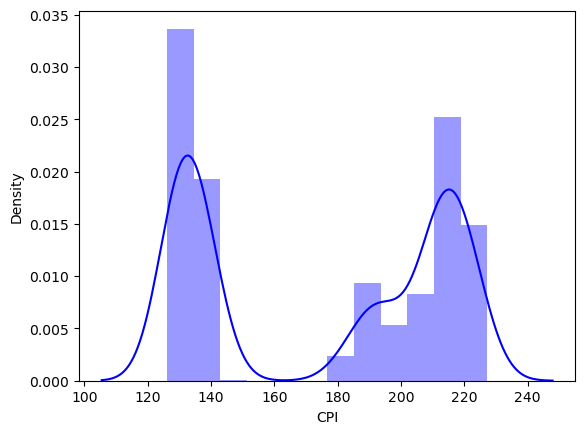

In [19]:
sns.distplot(df['CPI'],color="blue")

<Axes: xlabel='desempleo', ylabel='Density'>

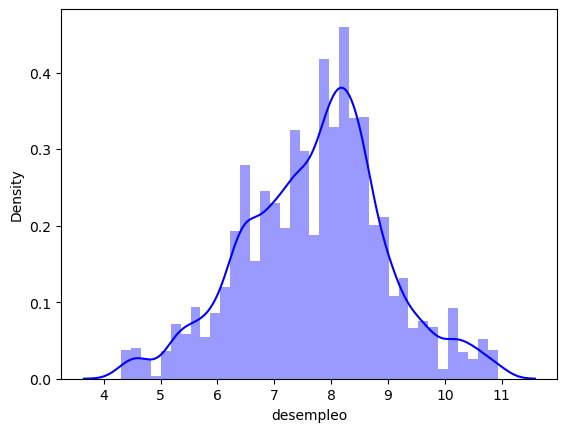

In [20]:
sns.distplot(df['desempleo'],color="blue")

En el primer gráficos podemos ver como el presupuesto de la televisión y su influencia tiene un relación positiva , mientras que las redes sociales y radio decae poco a poco, cada vez la prioridad se ve afectada con menos presupuesto. Las ventas se mantienen constantes pese a que la inversión de radio y redes sociales se vieron con un menor presupuesto.

Según la gráfica de Social Media se ve una distribución normal de cola derecha sería que la mayoría de los valores se concentran en el extremo izquierdo de la distribución, con una cola larga y extendida hacia la derecha. Esto sugiere que hay una asimetría en los datos, con valores más bajos siendo más frecuentes que los valores más altos. Además, la media estaría desplazada hacia la derecha, con una mediana y una moda menores que la media.

En la gráfica de Ventas los valores están mayoritariamente ubicados entre la primera y la segunda desviación estándar es que la distribución de los datos sigue una distribución normal. Esto sugiere que la mayoría de los datos se encuentran cerca de la media de la distribución, con una densidad de valores decreciente a medida que nos alejamos de la media en ambas direcciones. Además, la concentración de datos dentro de este rango específico entre la primera y la segunda desviación estándar indica que la distribución es relativamente simétrica y que la dispersión de los datos alrededor de la media es consistente y predecible. Permite realizar inferencias sobre la probabilidad de ocurrencia de ciertos.

### 6. Obtenga las correlaciones entre los datos de corte numérico 

In [ ]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

: 

In [ ]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr(numeric_only=True)
#
cols = corr.nlargest(6, "Ventas")["Ventas"].index
# Calculate correlation
for i in np.arange(1,5):
    if(i != 4):
        regline = df[cols[i]]
        ax = fig.add_subplot(3,2,i)
        sns.regplot(x=regline, y=df['Ventas'], scatter_kws={"color": "royalblue", "s": 3},
                    line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

: 

### 7. Comente que variables escogerán como variable dependiente y que variables introducirán a su modelo de regresión lineal, como variables explicativas. Justifique su respuesta.

Según las gráficas de correlación se puede observar que a medida de que el presupuesto de TV, Radio y Social Media aumentan el valor de Ventas también aumenta. 

Por ello, se puede decir que la variable dependiente es la de Ventas y las variables explicativas serían TV, Radio, Influencer y Social Media.

### 8. Grabe el primer modelo de regresión y otórguele el alias de su preferencia. Comente los resultados del modelo.

Primero se va a transformar la variable cualificativa de Influencer a cuantitativa utilizando labelEncoder:

In [ ]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

: 

In [ ]:
from sklearn.preprocessing import LabelEncoder

: 

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

: 

In [ ]:
df.Influencer = labelencoder.fit_transform(df.Influencer)
df

: 

Aplicamos logaritmos a nuestra variable dependiente:

In [ ]:
log_ventas=np.log(df.Ventas)
df['log_ventas']=log_ventas

: 

Procedemos con la aplicación de la regresión lineal:

In [ ]:
regresion = ols("log_ventas ~ TV + Radio + Influencer + Social_Media", data=df)
results = regresion.fit()

: 

In [ ]:
print(results.summary())

: 

Podemos observar que el R^2 ajustado es de el 0.924 lo que quiere decir que nuestro modelo alcanza a explicar un 92.4% la variablididad de nuestra variable dependiente con la inclusión de 3 variables.

No todas la variables pasaron el 95% de confianza. La variable de Influencer es mayor al 0.05 por lo que no debería ser tomada como variable explicativa.

### 9. Verifique los supuestos de la regresión lineal. Comente cada uno de ellos. 

#### 1. Multicolinearidad

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

: 

In [ ]:
df2=df[df.columns.difference(['Ventas', 'log_ventas'])]
df2

: 

In [ ]:
df2.dtypes

: 

Ahora si, calculemos el VIF de nuestras variables para ver que tan correlacionadas están entre sí:

In [ ]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)
  

: 

Solo la variable de Influencer es la única que no es mayor a 5, por lo que tiene una correlación moderada con Ventas pero no es potencialmente severa.

Aplicamos nuevamente el VIF habiendo removido la variable de Influencer.

In [ ]:
regresion_2 = ols("log_ventas ~ TV + Radio + Social_Media", data=df)
results_2 = regresion_2.fit()

: 

In [ ]:
print(results_2.summary())

: 

In [ ]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Influencer'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Influencer'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['Influencer'])].columns))]

print(vif_data)
  

: 

Observamos que mantenemos la misma R-squared ajustada.

#### 2. Linealidad en los parámetros

In [ ]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr(numeric_only=True)
#
cols = corr.nlargest(6, "log_ventas")["log_ventas"].index
# Calculate correlation
for i in np.arange(3,6):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['log_ventas'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

: 

Se puede observar que las variables de TV y Radio sus nubes de puntos no son tan dispersos a la línea de regresión. Por ello, gráficamente sí existe una relación lineal. Por otro lado, la variable Social Media no está tan relacionada a la línea de regresión.

#### 3. Normalidad en los residuos

Para la normalidad en los residuos del modelo, compararemos mediantelos gráficos QQ (o gráfico de cuantiles-cuantiles)si los puntos del gráfico forman aproximadamente una línea diagonal recta.

In [ ]:
sm.qqplot(results_2.resid, line='q')

: 

Como podemos ver, las líneas azules que representan a los residuos caen cerca de la línea recta. Podemos observar en el gráfico de igual manera que existen observaciones que caen muy por fuera de la línea, por lo que un anális con la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos podría ser útil.

Para aplicar una prueba estadística como la de Jarque Bera, es conveniente importar un submódulo de statsmodels que son las estadisticas "stats"

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

: 

Recordemos que el test Jarque-Bera es una prueba de bondad de ajuste que determina si los datos de la muestra tienen asimetría y curtosis que coinciden con una distribución normal.

Como norma general, el estadístico de prueba de la prueba de Jarque-Bera es siempre un número positivo y cuanto más alejado de cero esté, habrá más evidencia de que los datos de la muestra no siguen una distribución normal.

La hipótesis nula de este test es:

- H0: Los datos se distribuyen normalmente
- H1: Los datos no se distribuyen normalmente

In [ ]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_2.resid)
lzip(nombres, jarque_bera)

: 

Los resultados sugieren que los datos no siguen una distribución normal, ya que la probabilidad asociada con la prueba Jarque-Bera es extremadamente baja. Además, la asimetría negativa y la kurtosis alta indican que la distribución tiene colas pesadas y un pico más alto en comparación con una distribución normal.

Finalmemte, podemos contrastar si la media de los residuos de este modelo es 0, o muy cercano a este. Para esto podemos extraer los residuos del modelo y calcular la media directamente:

In [ ]:
results_2.resid.mean()

: 

#### 4. Homocedasticidad en los residuos

Para comprobar este supuesto podemos graficar los valores ajustados frente a una gráfica de residuos. De existir heterocedasticidad, los residuos se dispersarán mucho más a medida que los valores ajustados aumenten creando una imagen de cono.

Aplicando a Python este gráfico se obtendría por medio del comando residplot dentro de seaborn.

In [ ]:
y_pred=results_2.predict()

: 

In [ ]:
sns.residplot(x=y_pred, y=results_2.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

: 

De la gráfica de residuos anterior, podríamos inferir que los residuos formaron ningún patrón. Por lo tanto, los residuos son dependientes entre sí.

Y además, los residuos tienen varianza constante. La varianza no parece aumentar/disminuir constantemente con el valor y_pred.

In [ ]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_2.resid, results.model.exog)
lzip(nombres, breuschpagan)

: 

Los resultados sugieren fuerte evidencia en contra de la hipótesis nula de homocedasticidad, lo que indica la presencia de heterocedasticidad en el modelo de regresión. La presencia de heterocedasticidad puede afectar la validez de las pruebas de significancia de los coeficientes en el modelo

### 10. Obtenga el modelo de regresión definitivo, argumente su respuesta e interprete los coeficientes.

Nuestra función lineal quedaría de la siguiente manera:

$$log_ventas = 3.93 + 0.02  \times  TV - 0.00012 \times Radio + 0.0065 \times Social Media $$


El modelo sugiere que la publicidad en TV tiene un impacto positivo en las ventas, mientras que la publicidad en radio y en redes sociales tiene un impacto negativo.

### 11. Grafique los valores predicho del modelo vs los valores reales. 

In [ ]:
df3=df2[df2.columns.difference(['log_ventas', 'log_Ventas', 'Influencer', 'Ventas'])]
# df3['intercepto']=1
df3=df3[[ 'TV', 'Radio', 'Social_Media']]
df3

: 

In [ ]:
results_2.predict()

: 

In [ ]:
y_pred2=results_2.predict(df3)
y_pred2

: 

### Comparemos las predicciones a los valores reales de Y

In [ ]:
df.log_ventas

: 